In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import ssl
import os    
ssl._create_default_https_context = ssl._create_unverified_context
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [11]:
# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Load the cifar-10 training and test datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_size = 40000
val_size = 10000
test_size = 10000

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
for batch_idx,(data , labels) in enumerate(train_loader):
  print(f'input {batch_idx}: {data.shape}, target: {labels.shape}')
  break

input 0: torch.Size([4, 3, 32, 32]), target: torch.Size([4])


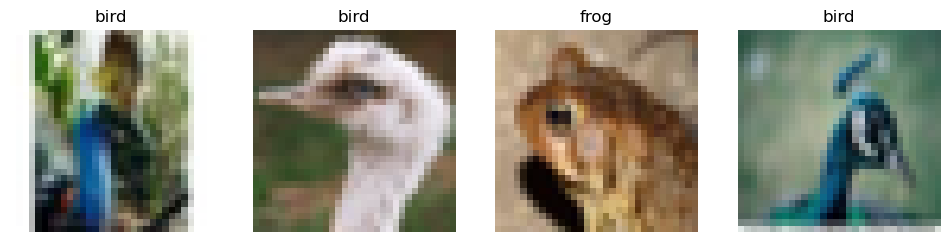

In [13]:


# Define class labels
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get a batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images with labels
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i in range(4):
    image = images[i] / 2 + 0.5  # Unnormalize
    np_image = image.permute(1, 2, 0).numpy()  # Convert to numpy array and change dimensions
    axes[i].imshow(np_image)
    axes[i].set_title(classes[labels[i]])
    axes[i].axis('off')

plt.show()


In [15]:

# Define the neural network
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(3 * 32 * 32, 92)  # Input size: 3 channels, 32x32 pixels
        self.fc2 = torch.nn.Linear(92, 46)
        self.fc3 = torch.nn.Linear(46, 10)  # Output size: 10 classes
    
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten input image
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the neural network
model = NeuralNetwork()

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_acc = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_acc.append(epoch_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Plot training accuracy vs. number of epochs
plt.plot(range(1, num_epochs + 1), train_acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 92)
        self.fc2 = nn.Linear(92, 46)
        self.fc3 = nn.Linear(46, 10)
    
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define training function
def train(model, train_loader, optimizer, criterion, num_epochs=20):
    train_acc = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_acc.append(epoch_acc)
        
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    
    return train_acc

# Define validation function
def validate(model, val_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_acc = correct / total
    return val_acc

# Define test function
def test(model, test_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc = correct / total
    return test_acc

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split dataset into train, validation, and test sets
train_size = 40000
val_size = 10000
test_size = 10000

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for train, validation, and test datasets
train_loader_4 = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
train_loader_64 = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define hyperparameters combinations
hyperparams = [
    {'batch_size': 4, 'lr': 0.01},
    {'batch_size': 4, 'lr': 0.001},
    {'batch_size': 64, 'lr': 0.01},
    {'batch_size': 64, 'lr': 0.001}
]

# Train and evaluate the model for each hyperparameters combination
results = []

for params in hyperparams:
    print(f"Training with batch size {params['batch_size']} and learning rate {params['lr']}")
    
    # Instantiate the model
    model = NeuralNetwork()
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=params['lr'])
    
    # Train the model
    train_acc = train(model, train_loader_4 if params['batch_size'] == 4 else train_loader_64, optimizer, criterion)
    
    # Validate the model
    val_acc = validate(model, val_loader)
    
    # Test the model
    test_acc = test(model, test_loader)
    
    # Store results
    results.append({'batch_size': params['batch_size'], 'lr': params['lr'], 'train_acc': train_acc[-1], 'val_acc': val_acc, 'test_acc': test_acc})

# Print results
print("Results:")
for result in results:
        print(f"Batch Size: {result['batch_size']}, Learning Rate: {result['lr']}, Train Accuracy: {result['train_acc']:.4f}, Validation Accuracy: {result['val_acc']:.4f}, Test Accuracy: {result['test_acc']:.4f}")



Files already downloaded and verified
Files already downloaded and verified
Training with batch size 4 and learning rate 0.01
Epoch [1/20], Loss: 1.7170, Accuracy: 0.3880
Epoch [2/20], Loss: 1.5187, Accuracy: 0.4606
Epoch [3/20], Loss: 1.4325, Accuracy: 0.4934
Epoch [4/20], Loss: 1.3660, Accuracy: 0.5140
Epoch [5/20], Loss: 1.3198, Accuracy: 0.5325
Epoch [6/20], Loss: 1.2719, Accuracy: 0.5504
Epoch [7/20], Loss: 1.2340, Accuracy: 0.5615
Epoch [8/20], Loss: 1.2011, Accuracy: 0.5731
Epoch [9/20], Loss: 1.1696, Accuracy: 0.5816
Epoch [10/20], Loss: 1.1440, Accuracy: 0.5917
Epoch [11/20], Loss: 1.1159, Accuracy: 0.6002
Epoch [12/20], Loss: 1.0925, Accuracy: 0.6083
Epoch [13/20], Loss: 1.0678, Accuracy: 0.6176
Epoch [14/20], Loss: 1.0482, Accuracy: 0.6252
Epoch [15/20], Loss: 1.0242, Accuracy: 0.6328
Epoch [16/20], Loss: 1.0056, Accuracy: 0.6370
Epoch [17/20], Loss: 0.9847, Accuracy: 0.6481
Epoch [18/20], Loss: 0.9683, Accuracy: 0.6499
Epoch [19/20], Loss: 0.9555, Accuracy: 0.6574
Epoch [20

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Train Loss: 2.0261, Val Loss: 1.8302
Epoch 2, Train Loss: 1.7329, Val Loss: 1.6794
Epoch 3, Train Loss: 1.6190, Val Loss: 1.6060
Epoch 4, Train Loss: 1.5465, Val Loss: 1.5605
Epoch 5, Train Loss: 1.4917, Val Loss: 1.5180
Epoch 6, Train Loss: 1.4448, Val Loss: 1.4900
Epoch 7, Train Loss: 1.4034, Val Loss: 1.4665
Epoch 8, Train Loss: 1.3683, Val Loss: 1.4561
Epoch 9, Train Loss: 1.3363, Val Loss: 1.4369
Epoch 10, Train Loss: 1.3073, Val Loss: 1.4235
Epoch 11, Train Loss: 1.2790, Val Loss: 1.4145
Epoch 12, Train Loss: 1.2524, Val Loss: 1.4119
Epoch 13, Train Loss: 1.2270, Val Loss: 1.3988
Epoch 14, Train Loss: 1.2030, Val Loss: 1.4146
Validation loss hasn't decreased, Stopping training.


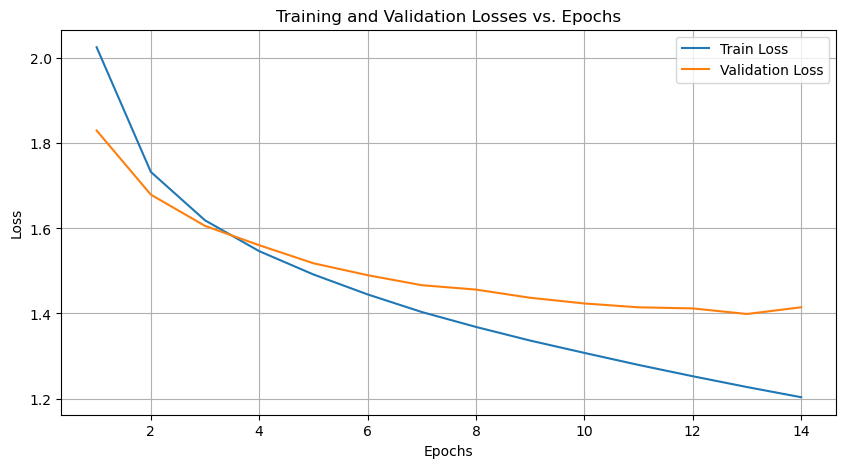

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 92)
        self.fc2 = nn.Linear(92, 46)
        self.fc3 = nn.Linear(46, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load CIFAR-10 dataset and preprocess it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# Define function to train the model with early stopping
def train_with_early_stopping(model, criterion, optimizer, trainloader, valloader, max_epochs=100):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(max_epochs):
        running_train_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Calculate validation loss
        with torch.no_grad():
            running_val_loss = 0.0
            for i, data in enumerate(valloader, 0):
                inputs, labels = data
                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

        # Compute average training and validation loss
        train_loss = running_train_loss / len(trainloader)
        val_loss = running_val_loss / len(valloader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
                print(f"Validation loss hasn't decreased, Stopping training.")
                break

    return train_losses, val_losses

# Define hyperparameters
batch_size = 4
lr = 0.001

# Create model, criterion, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# Split train set into train and validation
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

# Create data loaders for train and validation sets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

# Train the model with early stopping
train_losses, val_losses = train_with_early_stopping(model, criterion, optimizer, trainloader, valloader)

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses vs. Epochs')
plt.legend()
plt.grid()
plt.show()
